<a href="https://colab.research.google.com/github/JoshAmpofo/Zummit_Africa_Fellowship/blob/main/Classification_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Description**

Conduct a comparative study to evaluate the performance of various classification models for fraud detection in a given dataset. Employ accuracy score as the primary evaluation metric
Evaluate the performance of the following classification algorithms:

***K-Nearest  Neighbour***

***Decision Trees***

***Logistic Regression***

***Support Vector Machine (SVM)***


**Dataset Source**: [Fraud Detection Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)


**Key Features:**

***id***: Unique identifier for each transaction

***V1-V28***: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

***Amount***:
The transaction amount

***Class***:
Binary label indicating whether the transaction is fraudulent (1) or not (0)

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Get and Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fraud_df = pd.read_csv('/content/drive/My Drive/Zummit_Datasets/creditcard_2023.csv')
fraud_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Investigate Dataset

In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
# check for null/missing values
fraud_df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# quantitative description of dataset
fraud_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
# make a copy of dataset and perform all explorations and changes on it
fraud_df_cp = fraud_df.copy()

In [8]:
# drop id column
fraud_df_cp = fraud_df_cp.drop('id', axis=1)

In [9]:
fraud_df_cp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


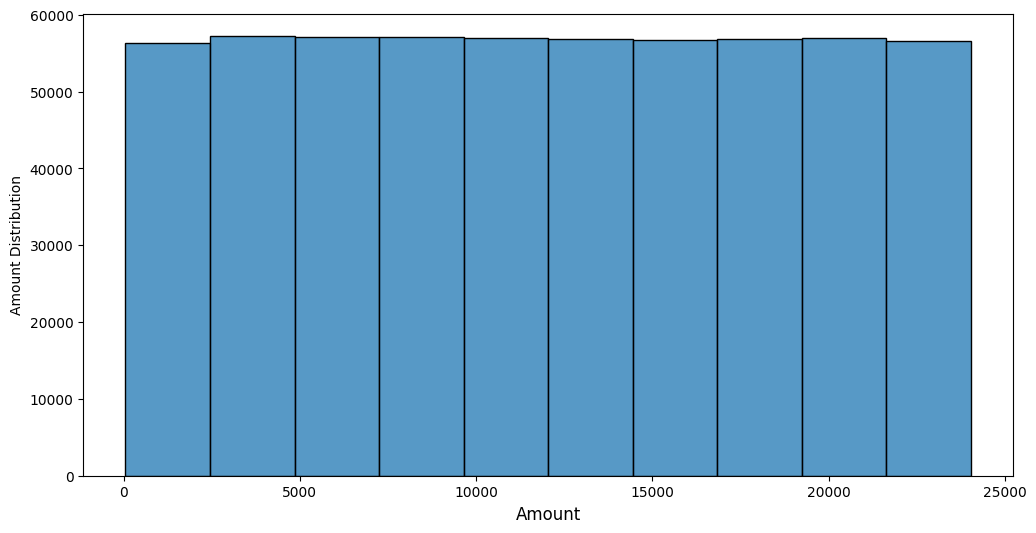

In [10]:
# viz amount
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_df_cp, x='Amount', bins=10, legend=False)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Amount Distribution')
plt.show()

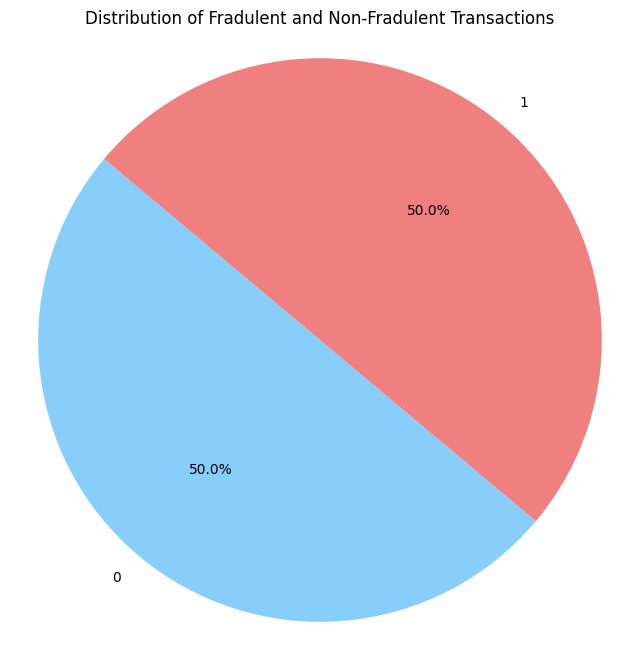

In [11]:
# pie chart of class
# get total value counts of class
class_count = fraud_df_cp['Class'].value_counts()

# get labels and sizes
labels = class_count.index
sizes = class_count.values

# set colors
colors = ['lightskyblue', 'lightcoral']

# plot pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fradulent and Non-Fradulent Transactions', fontsize=12)
plt.axis("equal")
plt.show()


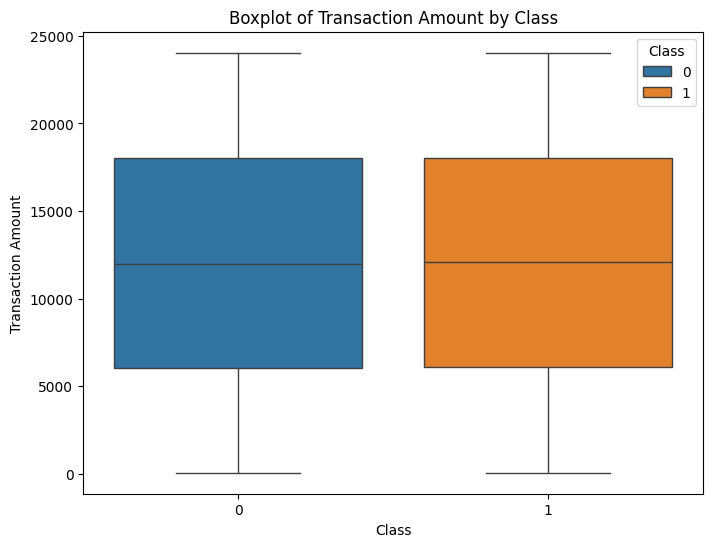

In [12]:
# boxplot of amount and class
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount', data=fraud_df_cp, hue='Class')
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

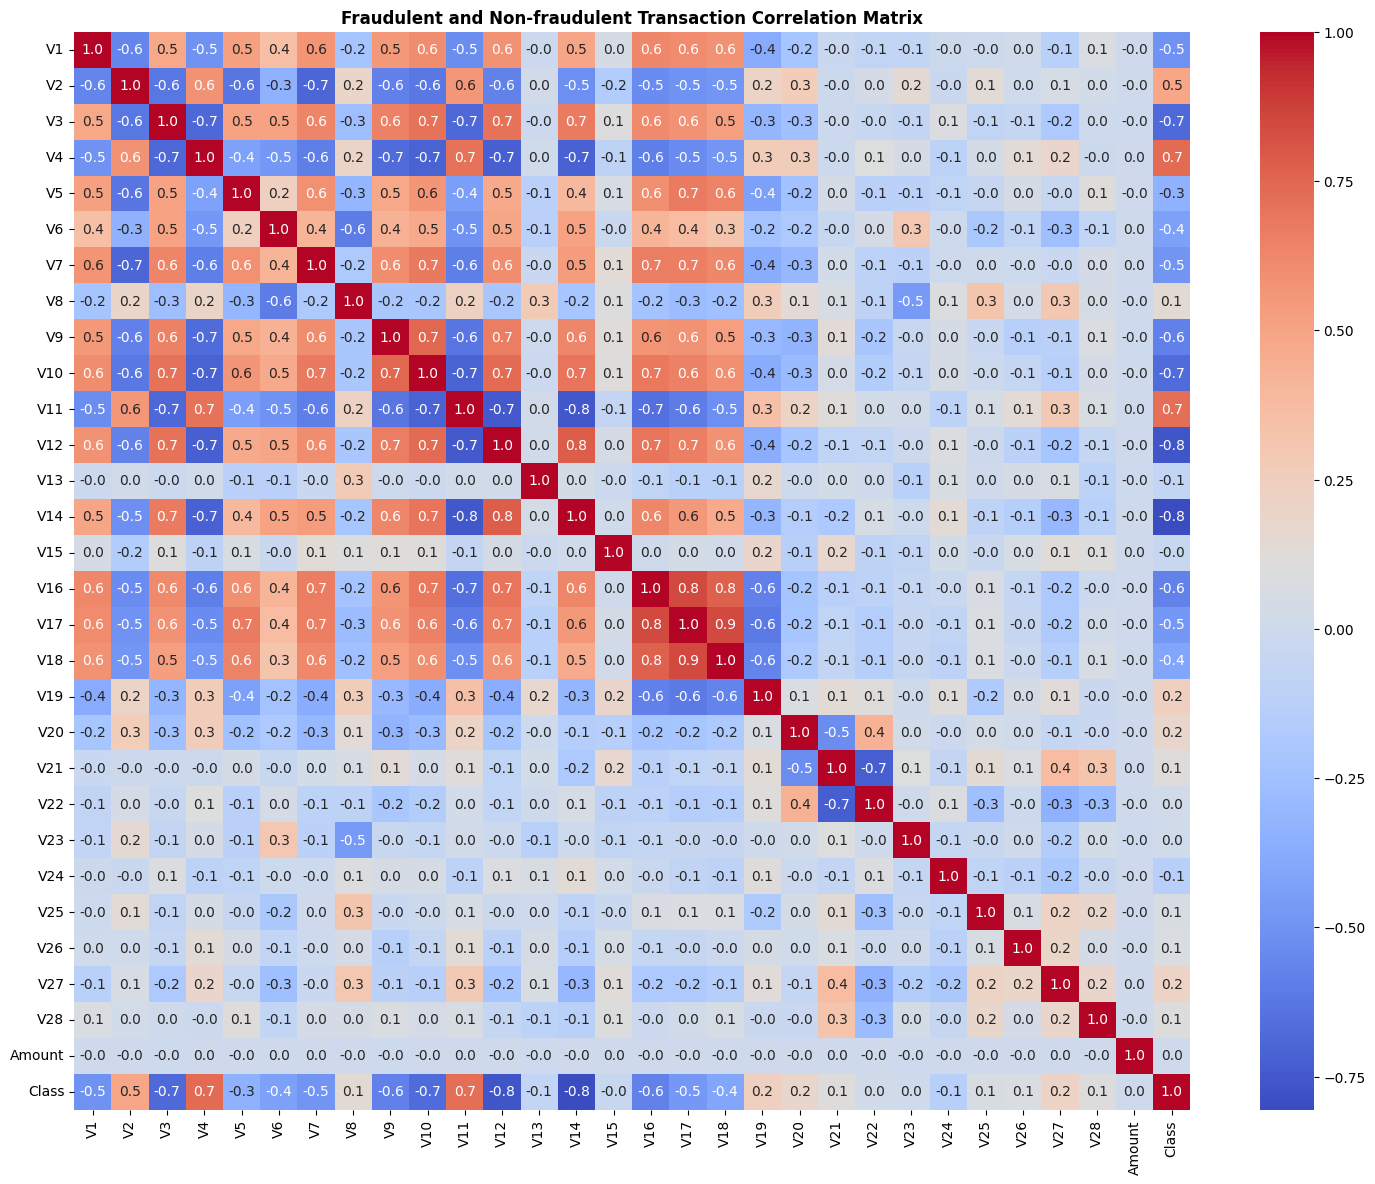

In [13]:
# heatmap
# Compute correlation matrix
corr_matrix = fraud_df_cp.corr()
# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Fraudulent and Non-fraudulent Transaction Correlation Matrix', fontsize=12, fontweight='bold')
plt.show()

#**Modelling**

#**1. KNearest Neighbors**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

In [15]:
X = fraud_df_cp.drop('Class', axis=1)
y = fraud_df_cp['Class']

In [16]:
# normalize and scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
# Model was extremely accurate (accuracy level of 1)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



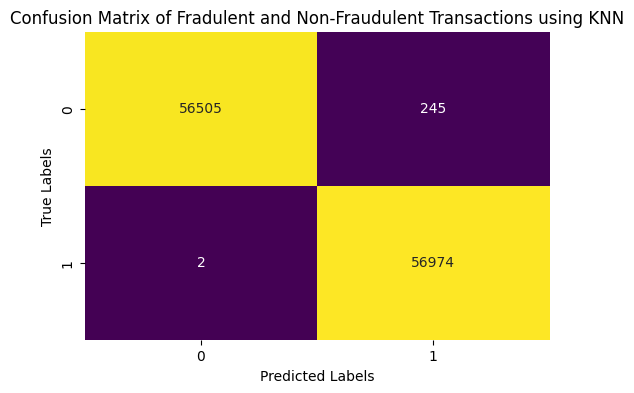

In [20]:
# Draw confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.title('Confusion Matrix of Fradulent and Non-Fraudulent Transactions using KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# 56,500+ non-fraudulent were correcctly predicted as non-fraudulent with 2 being incorrectly predicted as fraudelent
# 245 fraudulent were incorrectly predicted as non-fraudulent and 56,900+ were correctly predicted as fraudulent.

#**2. Decision Trees**

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [22]:
# initialize Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
# Predict on the test set
y_pred_2 = clf.predict(X_test)

In [24]:
# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred_2)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
class_report_2 = classification_report(y_test, y_pred_2)

print(f'Accuracy: {accuracy_2:.2f}')
print('Classification Report:')
print(class_report_2)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56750
           1       0.97      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



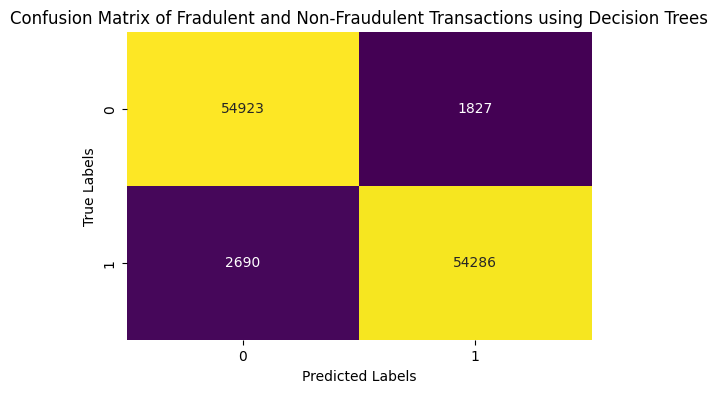

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_2, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.title('Confusion Matrix of Fradulent and Non-Fraudulent Transactions using Decision Trees')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# 54,900+ transaction were correctly predicted as non-fraudulent, 2600+ were incorrectly labeled as fradulent
# 54,200+ transactions were correctly predicted as fraudulent, 1800+ were incorrectly labeled as non-fradulent

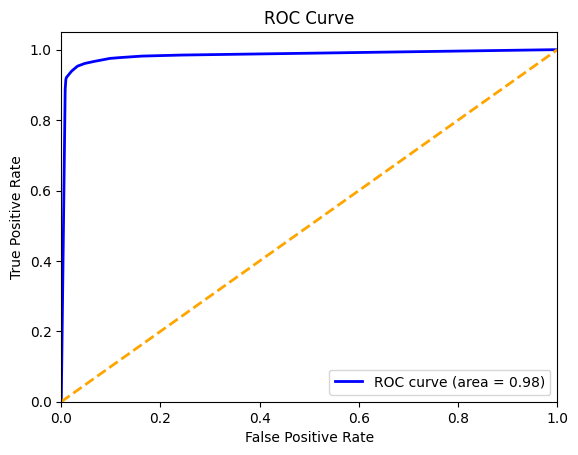

In [28]:
# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#**3. Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# initialize model
log_reg = LogisticRegression()
# fit model to data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# make predictions
y_pred_3 = log_reg.predict(X_test)


In [32]:
# predict probabilities
y_pred_prob_2 = log_reg.predict_proba(X_test)[:, 1]

In [33]:
# Evaluate model
accuracy_3 = accuracy_score(y_test, y_pred_3)
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
class_report_3 = classification_report(y_test, y_pred_3)

print(f'Accuracy: {accuracy_3:.2f}')
print('Classification Report:')
print(class_report_3)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



ROC-AUC Score: 0.99


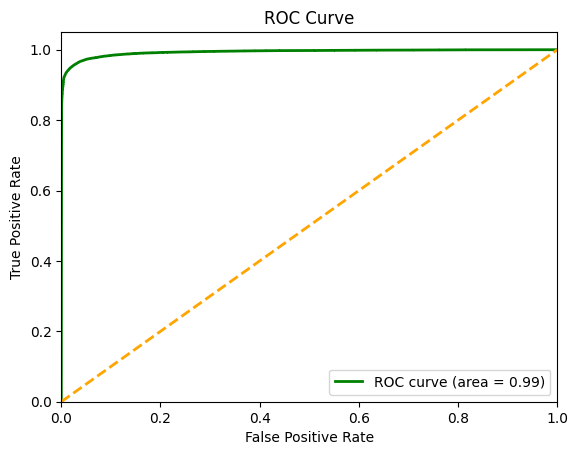

In [35]:
# Plot ROC Curve
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob_2):.2f}')

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_2)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

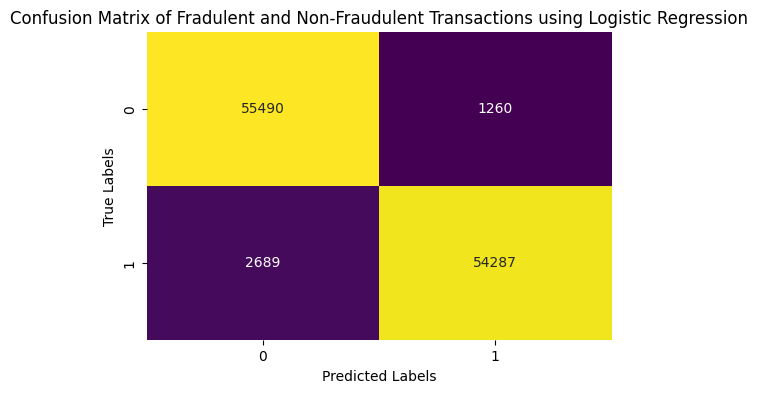

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_3, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.title('Confusion Matrix of Fradulent and Non-Fraudulent Transactions using Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#**4. Support Vector Machine**

In [42]:
from sklearn.svm import LinearSVC
# perform PCA to reduce dimension of the data for SVM training
from sklearn.decomposition import PCA

In [43]:
# initialize PCA and set variance to 0.95 (95% data variance should be maintained)
pca = PCA(n_components=0.95)

# fit and transform data
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [44]:
# Train the model
lin_svc = LinearSVC(C=1.0, max_iter=100000, random_state=42)
lin_svc.fit(X_train_reduced, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100000, random_state=42)

In [45]:
# make predictions
y_pred_4 = lin_svc.predict(X_test_reduced)

In [46]:
# evaluate the model
accuracy_4 = accuracy_score(y_test, y_pred_4)
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)
class_report_4 = classification_report(y_test, y_pred_4)

print(f'Accuracy: {accuracy_4:.2f}')
print('Classification Report:')
print(class_report_4)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



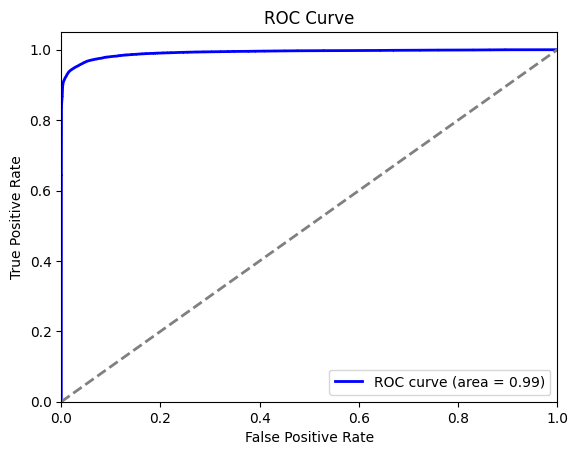

In [47]:
from sklearn.metrics import auc
# Get predicted probabilities for the positive class
y_pred_prob_2 = lin_svc.decision_function(X_test_reduced)

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

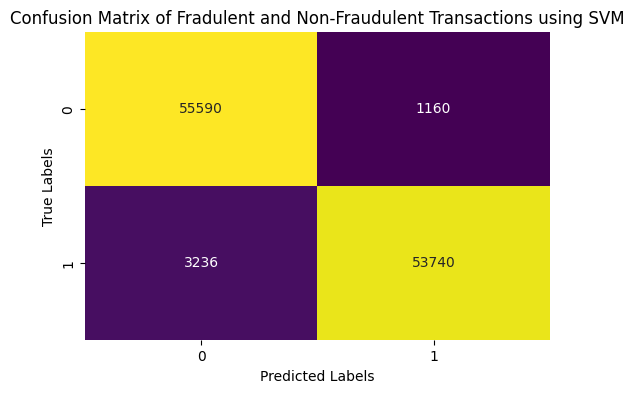

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_4, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.title('Confusion Matrix of Fradulent and Non-Fraudulent Transactions using SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Final thoughts:
Would go with KNN as the best model since it had a low number of fase postives and negatives!